In [1]:
import os, sys
ROOT_DIR = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
os.chdir(ROOT_DIR)
sys.path.append(ROOT_DIR)

In [3]:
# importing scripts in scripts folder
from scripts import config as srp
# importing default libraries
import numpy as np
import pandas as pd
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# TINY_SIZE=8
# SMALL_SIZE = 12
# MEDIUM_SIZE = 16
# BIGGER_SIZE = 20

import random
import pyreadr
from sklearn.preprocessing import StandardScaler

**** scripts/config.py IMPORTED!!!
**** PROJECT FOLDER ,  /home/pgundogdu/projects/signalization_prior_knowledge_based_nn


In [4]:
loc_output = './reports/figures/dataset_analysis'
srp.define_folder(os.path.join(loc_output))

FOLDER information,  ./reports/figures/dataset_analysis/


'./reports/figures/dataset_analysis/'

In [5]:
## Visualization purpose, normally needed to use hsa_mm for mouse experiment
df_bio = pd.read_csv('./data/processed/pbk_layer_hsa.txt')
print(df_bio.shape)
df_bio.head()

(2987, 94)


,symbol,hsa03320,hsa04010,hsa04012,hsa04014,hsa04015,hsa04020,hsa04022,hsa04024,hsa04062,...,hsa04925,hsa04960,hsa04961,hsa04962,hsa04970,hsa04971,hsa04972,hsa04973,hsa04976,hsa05100
0,akt3,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,tank,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,foxo6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,kir2ds2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,cldn24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
## MELANOMA EXPERIMENT
df_melanoma_reference = pyreadr.read_r('./data/external/exper_melanoma/reference.rds')[None]
df_melanoma_query = pyreadr.read_r('./data/external/exper_melanoma/query.rds')[None]
df_melanoma_reference.columns = df_melanoma_reference.columns.str.lower()
df_melanoma_query.columns = df_melanoma_query.columns.str.lower()

## MOUSE EXPERIMENT 
df_mouse_training = pd.read_pickle('./data/external/exper_mouse/mouse_learning.pck')
df_mouse_retrieval = pd.read_pickle('./data/external/exper_mouse/mouse_retrieval.pck')
df_mouse_training.columns = df_mouse_training.columns.str.lower()
df_mouse_retrieval.columns = df_mouse_retrieval.columns.str.lower()

## PBMC EXPERIMENT
df_pbmc = pd.read_pickle('./data/external/exper_pbmc/Immune.pck')
df_pbmc.columns = df_pbmc.columns.str.lower()

## IMMUNE EXPERIMENT
df_immune = pyreadr.read_r('./data/external/exper_immune/Fig3g.data.rds.gz')[None]
df_immune.columns = df_immune.columns.str.lower()
df_immune = df_immune.iloc[: , :-2]

In [20]:
gene_melanoma = set(df_melanoma_reference.columns).intersection(set(df_melanoma_query.columns))
gene_mouse = set(df_mouse_retrieval.columns).intersection(set(df_mouse_training.columns))
gene_immune_pbmc = set(df_immune.columns).intersection(set(df_pbmc.columns))
k_ =500
common_genes = set(df_bio['symbol']).intersection(gene_immune_pbmc.intersection(gene_melanoma.intersection(gene_mouse)))
random.seed(91)
random_genes = list(random.sample(list(common_genes), k=k_))
print(len(set(random_genes)))

500


## MELANOMA EXPERIMENT

### Reference Dataset

In [7]:
df_raw = df_melanoma_reference[random_genes]
caption_1 = 'Melanoma'
caption_2 = 'reference'
png_1 = '1'

(1380500, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/1.1_exper_Melanoma_reference_TPM.png
(1380500, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/1.2_exper_Melanoma_reference_TPM_sw.png
(1380500, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/1.3_exper_Melanoma_reference_TPM_log1p.png
(1380500, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/1.4_exper_Melanoma_reference_TPM_sw_log1p.png


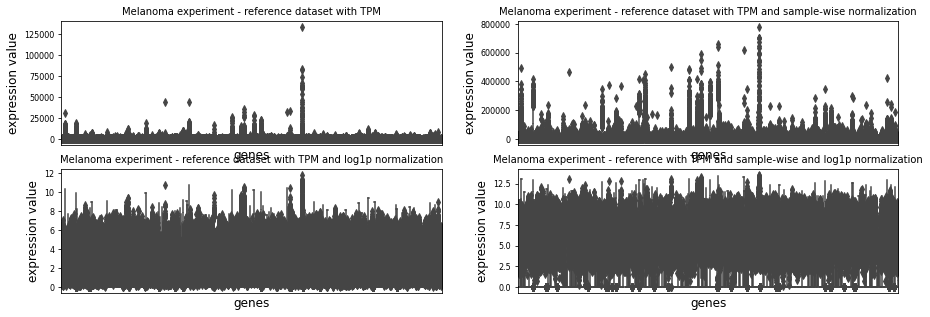

In [8]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15,8))

## ORIGINAL DATASET
df_melt = pd.melt(df_raw)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' dataset with TPM'
                  , axes = axes[0,0]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.1_exper_'+caption_1+'_'+caption_2+'_TPM.png')

## ORIGINAL DATASET with SAMPLE-WISE NORMALIZATION
df_sw = pd.concat([df_raw.iloc[:, :-1].div(df_raw.iloc[:, :-1].sum(axis=1), axis=0)*1e6
                   , df_raw.iloc[:, -1]], axis=1)
df_melt = pd.melt(df_sw)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' dataset with TPM and sample-wise normalization'
                  , axes = axes[0,1]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.2_exper_'+caption_1+'_'+caption_2+'_TPM_sw.png')

## ORIGINAL DATASET with LOG NORMALIZATION
df_log1p = np.log1p(df_raw)
df_melt = pd.melt(df_log1p)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' dataset with TPM and log1p normalization'
                  , axes = axes[1,0]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.3_exper_'+caption_1+'_'+caption_2+'_TPM_log1p.png')

## ORIGINAL DATASET with SAMPLE-WISE and LOG NORMALIZATION
df_log1p = np.log1p(df_sw)
df_melt = pd.melt(df_log1p)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' with TPM and sample-wise and log1p normalization'
                  , axes = axes[1,1]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.4_exper_'+caption_1+'_'+caption_2+'_TPM_sw_log1p.png')

del(df_log1p)
del(df_sw)
del(df_raw)
del(df_melt)

### Query Dataset

In [9]:
df_raw = df_melanoma_query[random_genes]
caption_1 = 'Melanoma'
caption_2 = 'query'
png_1 = '2'

(1706000, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/2.1_exper_Melanoma_query_TPM.png
(1706000, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/2.2_exper_Melanoma_query_TPM_sw.png
(1706000, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/2.3_exper_Melanoma_query_TPM_log1p.png
(1706000, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/2.4_exper_Melanoma_query_TPM_sw_log1p.png


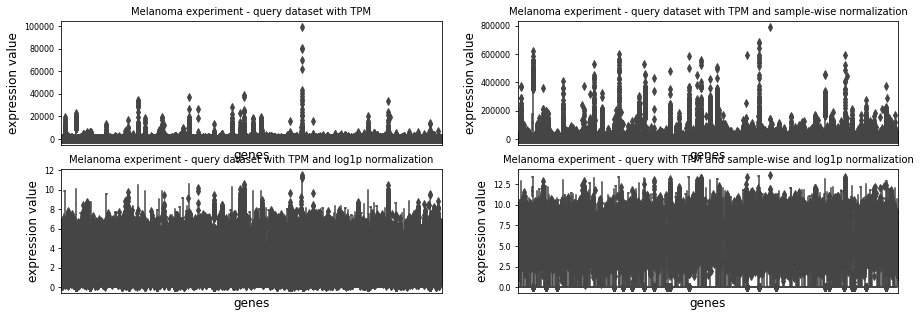

In [10]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15,8))

## ORIGINAL DATASET
df_melt = pd.melt(df_raw)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' dataset with TPM'
                  , axes = axes[0,0]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.1_exper_'+caption_1+'_'+caption_2+'_TPM.png')

## ORIGINAL DATASET with SAMPLE-WISE NORMALIZATION
df_sw = pd.concat([df_raw.iloc[:, :-1].div(df_raw.iloc[:, :-1].sum(axis=1), axis=0)*1e6
                   , df_raw.iloc[:, -1]], axis=1)
df_melt = pd.melt(df_sw)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' dataset with TPM and sample-wise normalization'
                  , axes = axes[0,1]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.2_exper_'+caption_1+'_'+caption_2+'_TPM_sw.png')

## ORIGINAL DATASET with LOG NORMALIZATION
df_log1p = np.log1p(df_raw)
df_melt = pd.melt(df_log1p)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' dataset with TPM and log1p normalization'
                  , axes = axes[1,0]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.3_exper_'+caption_1+'_'+caption_2+'_TPM_log1p.png')

## ORIGINAL DATASET with SAMPLE-WISE and LOG NORMALIZATION
df_log1p = np.log1p(df_sw)
df_melt = pd.melt(df_log1p)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' with TPM and sample-wise and log1p normalization'
                  , axes = axes[1,1]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.4_exper_'+caption_1+'_'+caption_2+'_TPM_sw_log1p.png')

del(df_log1p)
del(df_sw)
del(df_raw)
del(df_melt)

## MOUSE EXPERIMENT

### Training Dataset

In [11]:
df_raw = df_mouse_training[random_genes]
df_raw = df_raw.astype('float')
df_raw.reset_index(drop=True, inplace=True)
df_raw = df_raw.rename_axis(None, axis = 1)
caption_1 = 'Mouse'
caption_2 = 'training'
png_1 = '3'

(201000, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/3.1_exper_Mouse_training_TPM.png
(201000, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/3.2_exper_Mouse_training_TPM_sw.png
(201000, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/3.3_exper_Mouse_training_TPM_log1p.png
(201000, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/3.4_exper_Mouse_training_TPM_sw_log1p.png
(201000, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/3.5_exper_Mouse_training_TPM_ss.png
(201000, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/3.6_exper_Mouse_training_TPM_sw_ss.png


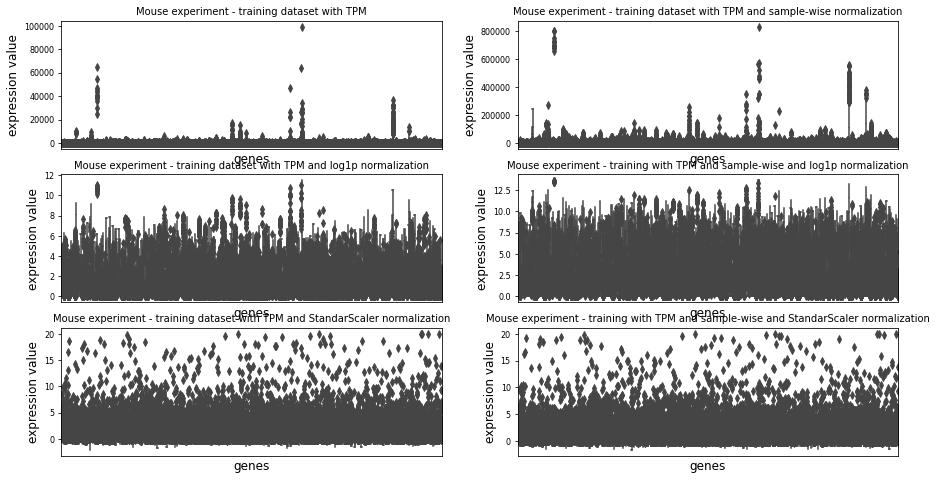

In [12]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15,12))

## ORIGINAL DATASET
df_melt = pd.melt(df_raw)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' dataset with TPM'
                  , axes = axes[0,0]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.1_exper_'+caption_1+'_'+caption_2+'_TPM.png')

## ORIGINAL DATASET with SAMPLE-WISE NORMALIZATION
df_sw = pd.concat([df_raw.iloc[:, :-1].div(df_raw.iloc[:, :-1].sum(axis=1), axis=0)*1e6
                   , df_raw.iloc[:, -1]], axis=1)
df_melt = pd.melt(df_sw)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' dataset with TPM and sample-wise normalization'
                  , axes = axes[0,1]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.2_exper_'+caption_1+'_'+caption_2+'_TPM_sw.png')

## ORIGINAL DATASET with LOG NORMALIZATION
df_log1p = np.log1p(df_raw)
df_melt = pd.melt(df_log1p)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' dataset with TPM and log1p normalization'
                  , axes = axes[1,0]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.3_exper_'+caption_1+'_'+caption_2+'_TPM_log1p.png')

## ORIGINAL DATASET with SAMPLE-WISE and LOG NORMALIZATION
df_log1p = np.log1p(df_sw)
df_melt = pd.melt(df_log1p)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' with TPM and sample-wise and log1p normalization'
                  , axes = axes[1,1]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.4_exper_'+caption_1+'_'+caption_2+'_TPM_sw_log1p.png')

## ORIGINAL DATASET with STANDARDSCALER NORMALIZATION
df_ss = pd.DataFrame(StandardScaler().fit_transform(df_raw), columns=[df_raw.columns])
df_melt = pd.melt(df_ss)
df_melt.columns = ['variable','value']
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' dataset with TPM and StandarScaler normalization'
                  , axes = axes[2,0]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.5_exper_'+caption_1+'_'+caption_2+'_TPM_ss.png')

## ORIGINAL DATASET with SAMPLE-WISE and STANDARDSCALER NORMALIZATION
df_ss = pd.DataFrame(StandardScaler().fit_transform(df_sw), columns=[df_sw.columns])
df_melt = pd.melt(df_ss)
df_melt.columns = ['variable','value']
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' with TPM and sample-wise and StandarScaler normalization'
                  , axes = axes[2,1]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.6_exper_'+caption_1+'_'+caption_2+'_TPM_sw_ss.png')

del(df_log1p)
del(df_sw)
del(df_ss)
del(df_raw)
del(df_melt)

### Retrieval Dataset

In [13]:
df_raw = df_mouse_retrieval[random_genes]
df_raw = df_raw.astype('float')
df_raw.reset_index(drop=True, inplace=True)
df_raw = df_raw.rename_axis(None, axis = 1)
caption_1 = 'Mouse'
caption_2 = 'retrieval'
png_1 = '4'

(8646500, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/4.1_exper_Mouse_retrieval_TPM.png
(8646500, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/4.2_exper_Mouse_retrieval_TPM_sw.png
(8646500, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/4.3_exper_Mouse_retrieval_TPM_log1p.png
(8646500, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/4.4_exper_Mouse_retrieval_TPM_sw_log1p.png
(8646500, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/4.5_exper_Mouse_retrieval_TPM_ss.png
(8646500, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/4.6_exper_Mouse_retrieval_TPM_sw_ss.png


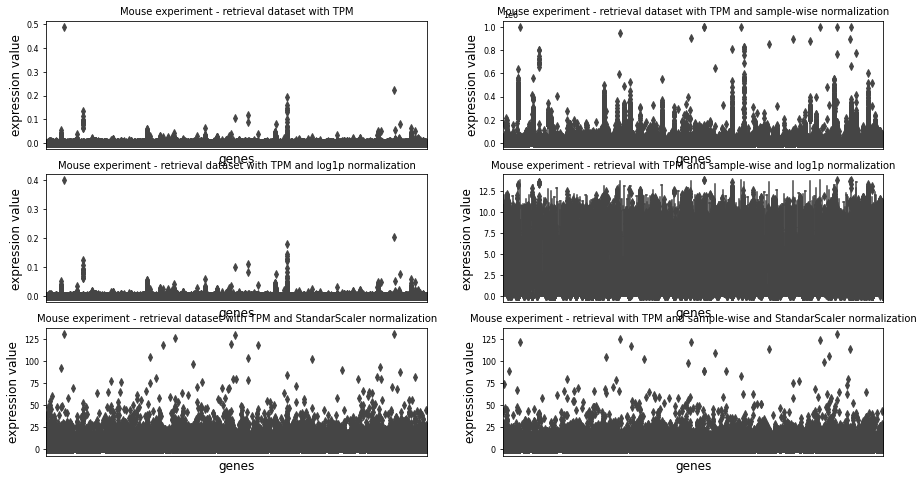

In [14]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15,12))

## ORIGINAL DATASET
df_melt = pd.melt(df_raw)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' dataset with TPM'
                  , axes = axes[0,0]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.1_exper_'+caption_1+'_'+caption_2+'_TPM.png')

## ORIGINAL DATASET with SAMPLE-WISE NORMALIZATION
df_sw = pd.concat([df_raw.iloc[:, :-1].div(df_raw.iloc[:, :-1].sum(axis=1), axis=0)*1e6
                   , df_raw.iloc[:, -1]], axis=1)
df_melt = pd.melt(df_sw)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' dataset with TPM and sample-wise normalization'
                  , axes = axes[0,1]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.2_exper_'+caption_1+'_'+caption_2+'_TPM_sw.png')

## ORIGINAL DATASET with LOG NORMALIZATION
df_log1p = np.log1p(df_raw)
df_melt = pd.melt(df_log1p)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' dataset with TPM and log1p normalization'
                  , axes = axes[1,0]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.3_exper_'+caption_1+'_'+caption_2+'_TPM_log1p.png')

## ORIGINAL DATASET with SAMPLE-WISE and LOG NORMALIZATION
df_log1p = np.log1p(df_sw)
df_melt = pd.melt(df_log1p)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' with TPM and sample-wise and log1p normalization'
                  , axes = axes[1,1]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.4_exper_'+caption_1+'_'+caption_2+'_TPM_sw_log1p.png')

## ORIGINAL DATASET with STANDARDSCALER NORMALIZATION
df_ss = pd.DataFrame(StandardScaler().fit_transform(df_raw), columns=[df_raw.columns])
df_melt = pd.melt(df_ss)
df_melt.columns = ['variable','value']
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' dataset with TPM and StandarScaler normalization'
                  , axes = axes[2,0]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.5_exper_'+caption_1+'_'+caption_2+'_TPM_ss.png')

## ORIGINAL DATASET with SAMPLE-WISE and STANDARDSCALER NORMALIZATION
df_ss = pd.DataFrame(StandardScaler().fit_transform(df_sw), columns=[df_sw.columns])
df_melt = pd.melt(df_ss)
df_melt.columns = ['variable','value']
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' with TPM and sample-wise and StandarScaler normalization'
                  , axes = axes[2,1]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.6_exper_'+caption_1+'_'+caption_2+'_TPM_sw_ss.png')

del(df_log1p)
del(df_sw)
del(df_raw)
del(df_melt)

## PBMC EXPERIMENT

In [15]:
df_raw = df_pbmc[random_genes]
df_raw = df_raw.astype('float')
df_raw.reset_index(drop=True, inplace=True)
df_raw = df_raw.rename_axis(None, axis = 1)

caption_1 = 'pbmc'
caption_2 = 'data'
png_1 = '5'

(8750000, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/5.1_exper_pbmc_data.png
(8750000, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/5.2_exper_pbmc_data_sw.png
(8750000, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/5.3_exper_pbmc_data_log1p.png
(8750000, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/5.4_exper_pbmc_data_sw_log1p.png


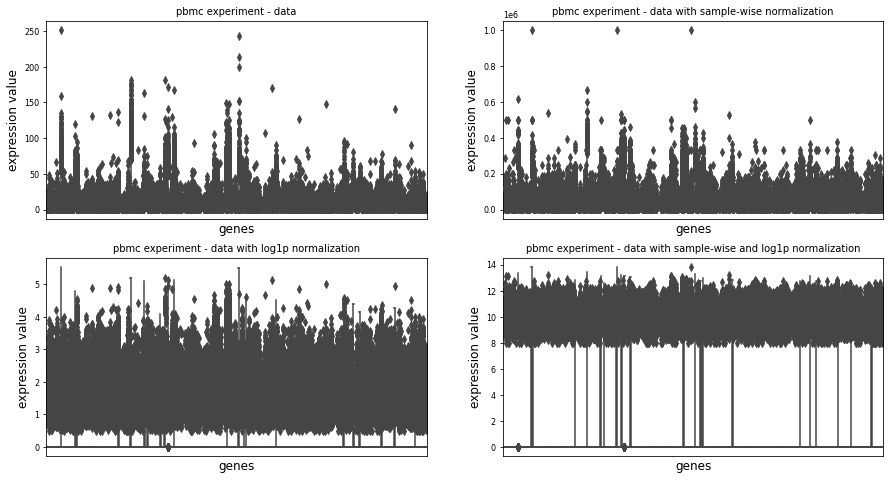

In [16]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15,8))

## ORIGINAL DATASET
df_melt = pd.melt(df_raw)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2
                  , axes = axes[0,0]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.1_exper_'+caption_1+'_'+caption_2+'.png')

## ORIGINAL DATASET with SAMPLE-WISE NORMALIZATION
df_sw = pd.concat([df_raw.iloc[:, :-1].div(df_raw.iloc[:, :-1].sum(axis=1), axis=0)*1e6
                   , df_raw.iloc[:, -1]], axis=1)
df_melt = pd.melt(df_sw)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' with sample-wise normalization'
                  , axes = axes[0,1]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.2_exper_'+caption_1+'_'+caption_2+'_sw.png')

## ORIGINAL DATASET with LOG NORMALIZATION
df_log1p = np.log1p(df_raw)
df_melt = pd.melt(df_log1p)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' with log1p normalization'
                  , axes = axes[1,0]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.3_exper_'+caption_1+'_'+caption_2+'_log1p.png')

## ORIGINAL DATASET with SAMPLE-WISE and LOG NORMALIZATION
df_log1p = np.log1p(df_sw)
df_melt = pd.melt(df_log1p)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' with sample-wise and log1p normalization'
                  , axes = axes[1,1]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.4_exper_'+caption_1+'_'+caption_2+'_sw_log1p.png')

# ## ORIGINAL DATASET with STANDARDSCALER NORMALIZATION
# df_ss = pd.DataFrame(StandardScaler().fit_transform(df_raw))
# df_melt = pd.melt(df_ss)
# print(df_melt.shape)
# df_melt.head()

# plot_pathways(df = df_melt
#               , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
#               , caption = caption_1+' experiment - '+caption_2+' with StandardScaler normalization'
#               , png = png_1+'.5_exper_'+caption_1+'_'+caption_2+'_ss.png')

# ## ORIGINAL DATASET with SAMPLE-WISE and STANDARDSCALER NORMALIZATION
# df_ss = pd.DataFrame(StandardScaler().fit_transform(df_sw))
# df_melt = pd.melt(df_ss)
# print(df_melt.shape)
# df_melt.head()

# plot_pathways(df = df_melt
#               , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
#               , caption = caption_1+' experiment - '+caption_2+' with sample-wise and StandardScaler normalization'
#               , png = png_1+'.6_exper_'+caption_1+'_'+caption_2+'_sw_ss.png')

del(df_log1p)
del(df_sw)
# del(df_ss)
del(df_raw)
del(df_melt)

## IMMUNE EXPERIMENT

In [21]:
df_raw = df_immune[random_genes]
# df_raw = df_raw.astype('float')
# df_raw.reset_index(drop=True, inplace=True)
# df_raw = df_raw.rename_axis(None, axis = 1)

caption_1 = 'immune'
caption_2 = 'data'
png_1 = '6'

(4851500, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/6.1_exper_immune_data.png
(4851500, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/6.2_exper_immune_data_sw.png
(4851500, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/6.3_exper_immune_data_log1p.png
(4851500, 2)
EXPORTED!!,  ./reports/figures/dataset_analysis/6.4_exper_immune_data_sw_log1p.png


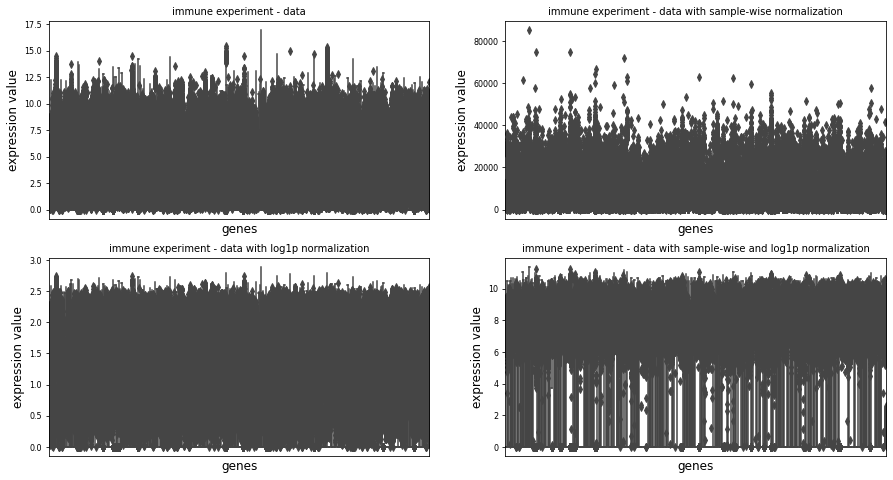

In [22]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15,8))

## ORIGINAL DATASET
df_melt = pd.melt(df_raw)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2
                  , axes = axes[0,0]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.1_exper_'+caption_1+'_'+caption_2+'.png')

## ORIGINAL DATASET with SAMPLE-WISE NORMALIZATION
df_sw = pd.concat([df_raw.iloc[:, :-1].div(df_raw.iloc[:, :-1].sum(axis=1), axis=0)*1e6
                   , df_raw.iloc[:, -1]], axis=1)
df_melt = pd.melt(df_sw)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' with sample-wise normalization'
                  , axes = axes[0,1]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.2_exper_'+caption_1+'_'+caption_2+'_sw.png')

## ORIGINAL DATASET with LOG NORMALIZATION
df_log1p = np.log1p(df_raw)
df_melt = pd.melt(df_log1p)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' with log1p normalization'
                  , axes = axes[1,0]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.3_exper_'+caption_1+'_'+caption_2+'_log1p.png')

## ORIGINAL DATASET with SAMPLE-WISE and LOG NORMALIZATION
df_log1p = np.log1p(df_sw)
df_melt = pd.melt(df_log1p)
print(df_melt.shape)
df_melt.head()

srp.plot_pathways(df = df_melt
                  , title = 'The distribution of gene expression value for randomly selected '+str(k_)+' genes'
                  , caption = caption_1+' experiment - '+caption_2+' with sample-wise and log1p normalization'
                  , axes = axes[1,1]
                  , save = True
                  , output=loc_output
                  , png = png_1+'.4_exper_'+caption_1+'_'+caption_2+'_sw_log1p.png')

del(df_log1p)
del(df_sw)
del(df_raw)
del(df_melt)

## GENE SPACE

In [24]:
print('melanoma_reference,', (df_melanoma_reference.iloc[:, df_melanoma_reference.columns.isin(df_bio['symbol'])]).shape)
print('melanoma_query    ,', (df_melanoma_query.iloc[:, df_melanoma_query.columns.isin(df_bio['symbol'])]).shape)
print('mouse_training    ,', (df_mouse_training.iloc[:, df_mouse_training.columns.isin(df_bio['symbol'])]).shape)
print('mouse_retrieval   ,', (df_mouse_retrieval.iloc[:, df_mouse_retrieval.columns.isin(df_bio['symbol'])]).shape)
print('pbmc              ,', (df_pbmc.iloc[:, df_pbmc.columns.isin(df_bio['symbol'])]).shape)
print('immune            ,', (df_immune.iloc[:, df_immune.columns.isin(df_bio['symbol'])]).shape)

melanoma_reference, (2761, 2877)
melanoma_query    , (3412, 2877)
mouse_training    , (402, 1648)
mouse_retrieval   , (17293, 1648)
pbmc              , (17500, 2348)
immune            , (9703, 2800)


In [23]:
gene_melanoma_reference = df_melanoma_reference.iloc[:, df_melanoma_reference.columns.isin(df_bio['symbol'])].columns
gene_melanoma_query = df_melanoma_query.iloc[:, df_melanoma_query.columns.isin(df_bio['symbol'])].columns

gene_mouse_training = df_mouse_training.iloc[:, df_mouse_training.columns.isin(df_bio['symbol'])].columns
gene_mouse_retrieval = df_mouse_retrieval.iloc[:, df_mouse_retrieval.columns.isin(df_bio['symbol'])].columns

gene_pbmc = df_pbmc.iloc[:, df_pbmc.columns.isin(df_bio['symbol'])].columns

gene_melanoma = set(gene_melanoma_reference).intersection(set(gene_melanoma_query))
gene_mouse = set(gene_mouse_training).intersection(set(gene_mouse_retrieval))

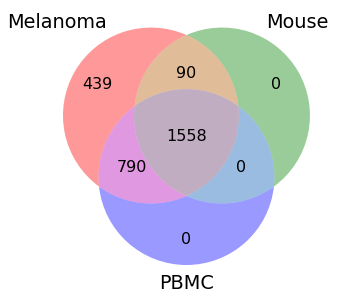

In [144]:
Abc = len((set(gene_melanoma).difference(set(gene_mouse))).difference(set(gene_pbmc)))
aBc = len((set(gene_mouse).difference(set(gene_melanoma))).difference(set(gene_pbmc)))
abC = len((set(gene_pbmc).difference(set(gene_melanoma))).difference(set(gene_mouse)))

ABc = len((set(gene_melanoma).intersection(set(gene_mouse))).difference(set(gene_pbmc)))
AbC = len((set(gene_melanoma).intersection(set(gene_pbmc))).difference(set(gene_mouse)))
aBC = len((set(gene_mouse).intersection(set(gene_pbmc))).difference(set(gene_melanoma)))

ABC = len((set(gene_melanoma).intersection(set(gene_mouse))).intersection(set(gene_pbmc)))

plt.figure(figsize=(5,5), facecolor="white")
venn3_unweighted(subsets = (Abc, aBc, ABc, abC, AbC, aBC, ABC), set_labels = ('Melanoma', 'Mouse', 'PBMC'));
plt.tight_layout();
plt.savefig(os.path.join(loc_output, 'gene_space.png'), dpi=300, bbox_inches = 'tight')